In [1]:
import numpy as np
import pandas as pd

In [2]:
#IMPORTAR FILE DE AYER
SNI = pd.read_csv('07-22-19.csv', 
                  usecols=['Report_Date DD/MM/YY','Outside Month/Inside Quarter','Region','Revision Result','Sub region', 'BU', 'EG AMS Net USD Amount', 'Sold To Customer Name','Sales Order Identifier'], encoding='latin-1')

SNI_ayer = SNI[(SNI['Outside Month/Inside Quarter'].isin(['Out of Quarter','Risk Without EID', '#N/A'])) & (SNI['Region']=='LA')
              & SNI['Revision Result'].isin(['Conditional Acceptance','Billing Block','Investigation','IT Issues',
                                             'Software','In Transit to Invoice','HUB'])
              & (SNI['BU'].isin(['ISS','Mission Critical','Storage']))]

In [3]:
#IMPORTAR FILE DE HOY
SNII = pd.read_csv('07-23-19.csv', 
                  usecols=['Report_Date DD/MM/YY','Outside Month/Inside Quarter','Region','Revision Result','Sub region', 'BU', 'EG AMS Net USD Amount', 'Sold To Customer Name','Sales Order Identifier'], encoding='latin-1')

SNI_hoy = SNII[(SNII['Outside Month/Inside Quarter'].isin(['Out of Quarter','Risk Without EID', ''])) & (SNII['Region']=='LA')
              & SNII['Revision Result'].isin(['Conditional Acceptance','Billing Block','Investigation','IT Issues',
                                             'Software','In Transit to Invoice','HUB'])
              & (SNII['BU'].isin(['ISS','Mission Critical','Storage']))]

In [4]:
#FORMATO DE LA COLUMNA MONEY A FLOAT
column1= SNI_ayer['EG AMS Net USD Amount'].str.replace('$','')
column1= column1.str.replace(',','')
column1= column1.astype('float64')
SNI_ayer['EG AMS Net USD Amount']= column1

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [5]:
column2= SNI_hoy['EG AMS Net USD Amount'].str.replace('$','')
column2= column2.str.replace(',','')
column2= column2.astype('float64')
SNI_hoy['EG AMS Net USD Amount']= column2

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [6]:
SNI_ayer['EG AMS Net USD Amount'].sum()

3180305.23

In [7]:
SNI_hoy['EG AMS Net USD Amount'].sum()

3170846.1

In [8]:
#Tabla principal
pivote_hoy= SNI_hoy.copy().pivot_table(index=['Sub region','Sold To Customer Name','Sales Order Identifier'],columns=['BU'], values='EG AMS Net USD Amount', aggfunc=np.sum, 
            fill_value=0,margins=True,margins_name='Total')

In [9]:
EndUser_hoy = SNI_hoy.copy()
EndUser_ayer = SNI_ayer.copy()

In [10]:
#COMPARAR LOS FILES - NUEVOS END USER
columnsdrop = ['Report_Date DD/MM/YY','BU','Revision Result','Outside Month/Inside Quarter', 'Region', 'Sales Order Identifier']
EndUser_hoy.drop(columnsdrop, inplace=True, axis=1)
EndUser_ayer.drop(columnsdrop, inplace=True, axis=1)

In [11]:
#OBTENER LOS NUEVOS END USER DEL ARCHIVO DE HOY
diff_df = pd.merge(EndUser_hoy, EndUser_ayer, how='outer', indicator='Exist')
diff_df = diff_df.loc[diff_df['Exist'] == 'left_only']
pivote_diff= diff_df.copy().pivot_table(index=['Sub region','Sold To Customer Name'], values='EG AMS Net USD Amount', aggfunc=np.sum, fill_value=0)

In [12]:
Order_hoy = SNI_hoy.copy()
Order_ayer = SNI_ayer.copy()

In [13]:
#COMPARAR LOS FILES - NUEVOS SALES ORDER
columnsdrop = ['Report_Date DD/MM/YY','BU','Revision Result','Outside Month/Inside Quarter', 'Region','EG AMS Net USD Amount']
Order_hoy.drop(columnsdrop, inplace=True, axis=1)
Order_ayer.drop(columnsdrop, inplace=True, axis=1)

In [14]:
diff_df2 = pd.merge(Order_hoy, Order_ayer, how='outer', indicator='Exist')
diff_df2 = diff_df2.loc[diff_df2['Exist'] == 'left_only']
diff_df2.drop_duplicates(inplace=True)
diff_df2

,Sales Order Identifier,Sold To Customer Name,Sub region,Exist
101084,303824639,Interatec Llc,MCA,left_only


In [15]:
Order_diff = SNI_hoy.merge(diff_df2, on=['Sales Order Identifier'], how='right')

In [16]:
Order_diff.rename(columns={'Sold To Customer Name_x': 'Sold To Customer Name', 'Sub region_x':'Sub region'}, inplace=True)
Order_hoy_pivote= Order_diff.copy().pivot_table(index=['Sub region','Sold To Customer Name','Sales Order Identifier'],columns=['BU'], values='EG AMS Net USD Amount', aggfunc=np.sum, fill_value=0,margins=True,margins_name='Total')

In [17]:
#PIE CHART

In [18]:
pivote_hoy_chart= SNI_hoy.copy().pivot_table(index=['Sub region'], values='EG AMS Net USD Amount', aggfunc=np.sum).apply(lambda x:100 * x / float(x.sum())).round(2)

# SNI Exit Report

### Today´s SNI Details

In [19]:
pivote_hoy

BU                                                                                           ISS  \
Sub region Sold To Customer Name                              Sales Order Identifier               
Brazil     SCANSOURCE BRASIL DISTRIBUIDORA                    303827213                  4211.10   
MCA        BANCO INTERNACIONAL DEL PERU S.A.A.                303826714                     0.00   
                                                              303826788                     0.00   
           BBVA COLOMBIA                                      303793001                357290.75   
           Banco de Chile                                     303824470                     0.00   
           COLOMBIA TELECOMUNICACIONES S A E S P              303749607                  1763.00   
                                                              303795615                   154.12   
           COMESTIBLES LA ROSA S.A                            303825922                  1000.00   
           Interatec Llc                                      303824639                  1149.12   
           Itau Corpbanca                                     303812884                     0.00   
                                                              303813226                 99205.08   
           OLD MUTUAL VALORES S A                             303824679                     4.33   
           Pontificia Universidad Catolica de Chile*          303812885                     0.00   
           TELEFONICA DEL PERU SAA                            303787060                 32312.08   
           TERNIUM ARGENTINA S.A.                             303802871                  7466.88   
           Telefonica Moviles Chile S.A.                      303786200                266852.65   
                                                              303786892                164964.39   
                                                              303789057                186416.39   
Mexico     AT&T Comunicaciones Digitales, S. de R.L. de C.V.  303786924                449956.98   
           Banco Nacional de México, S.A., Integrante del ... 303812910                 29159.86   
                                                              303812965                 29159.86   
           ERICSSON TELECOM SA DE CV                          303801728                  2798.40   
           FORD MOTOR COMPANY SA DE CV                        303828863                 34482.29   
                                                              303829128                 13986.21   
           Nokia de México, S.A. de C.V.                      303810140                 90922.53   
           TERNIUM MEXICO S.A. DE C.V.                        303812863                  3873.35   
           Triara.com, S.A. de C.V.                           303776532                     0.00   
                                                              303776533                370075.23   
                                                              303776628                479856.92   
                                                              303776629                  2046.68   
                                                              303777091                  2007.26   
                                                              303777092                     0.00   
                                                              303777288                  2007.26   
                                                              303777344                  2026.74   
                                                              303804673                 18713.72   
Total                                                                                 2653863.18   

BU                                                                                    Mission Critical  \
Sub region Sold To Customer Name                              Sales Order Identifier         

### Participation by Country

(-1.25, 1.25, -1.25, 1.25)

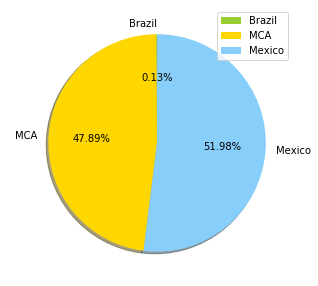

In [23]:
import matplotlib.pyplot as plot
colors = ['yellowgreen', 'gold', 'lightskyblue']
plot = pivote_hoy_chart.plot.pie(y='EG AMS Net USD Amount', figsize=(5, 5),colors=colors, shadow=True, startangle=90, autopct='%.2f%%')
plot.axis('off')

### Today´s New End Users

In [21]:
pivote_diff

,,EG AMS Net USD Amount
Sub region,Sold To Customer Name,
MCA,Interatec Llc,1480.79


### Today´s New Sales Orders

In [22]:
Order_hoy_pivote

,,BU,ISS,Storage,Total
Sub region,Sold To Customer Name,Sales Order Identifier,,,
MCA,Interatec Llc,303824639,1149.12,331.67,1480.79
Total,,,1149.12,331.67,1480.79
